# Reinforcement-Learning-Experiment-With-Simple-Bandit-Learning-Algorithms

Introduction

This assignment explores the performance of various bandit algorithms in both stationary and non-stationary environments. The goal is to compare these algorithms based on their ability to maximize rewards and select optimal actions over time.

Experiment Setup

* Number of Bandit Problems: 1000
* Time Steps per Problem: 1000 for stationary, 20000 for non-stationary
* Evaluation Metrics:
     - Average Reward per Time Step
     - Proportion of Optimal Actions Selected per Time Step

Algorithms Implemented





1.  Greedy with Non-Optimistic Initial Values
2.  Epsilon-Greedy with Different Epsilon Values
3. Optimistic Initial Values with a Greedy Approach
4. Gradient Bandit Algorithm with Different Learning Rates



Part 1: Stationary Bandit Problems

Algorithms and Implementation

1. Greedy Algorithm

Description:

Action value estimates initialized to 0.
Always selects the action with the highest current estimate.

Class Implementation:

In [28]:
import numpy as np
import matplotlib.pyplot as plt

class GreedyBandit:
    def __init__(self, k=10):
        self.k = k
        self.q_true = np.random.randn(k)  # True mean values from N(0, 1)
        self.q_estimates = np.zeros(k)  # Estimates initialized to 0
        self.action_count = np.zeros(k)
        self.total_reward = 0
        self.time = 0

    def act(self):
        """Choose action based on current estimates (greedily)."""
        action = np.argmax(self.q_estimates)
        return action

    def step(self):
        action = self.act()
        reward = np.random.randn() + self.q_true[action]
        self.time += 1
        self.action_count[action] += 1
        self.q_estimates[action] += (reward - self.q_estimates[action]) / self.action_count[action]
        self.total_reward += reward
        return action, reward


Simulation and Plotting

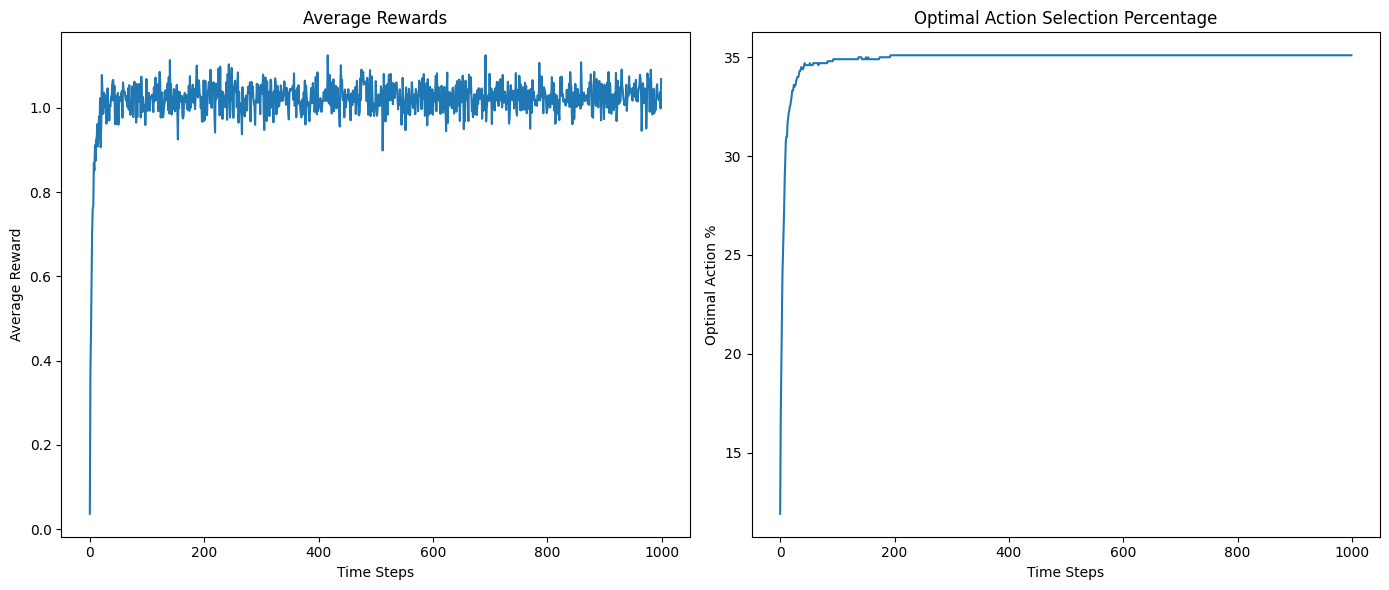

In [29]:
def simulate_bandit_problems(num_problems=1000, time_steps=1000):
    rewards = np.zeros((num_problems, time_steps))
    optimal_actions = np.zeros((num_problems, time_steps))

    for problem in range(num_problems):
        bandit = GreedyBandit()
        optimal_action = np.argmax(bandit.q_true)

        for t in range(time_steps):
            action, reward = bandit.step()
            rewards[problem, t] = reward
            optimal_actions[problem, t] = 1 if action == optimal_action else 0

    mean_rewards = np.mean(rewards, axis=0)
    optimal_action_percents = np.mean(optimal_actions, axis=0) * 100

    return mean_rewards, optimal_action_percents

mean_rewards, optimal_action_percents = simulate_bandit_problems()

# Plotting the results
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(mean_rewards)
plt.title("Average Rewards")
plt.xlabel("Time Steps")
plt.ylabel("Average Reward")

plt.subplot(1, 2, 2)
plt.plot(optimal_action_percents)
plt.title("Optimal Action Selection Percentage")
plt.xlabel("Time Steps")
plt.ylabel("Optimal Action %")

plt.tight_layout()
plt.show()


Analysis:

* **Average Rewards:** The average reward increases gradually over time as the algorithm improves its estimates.
* **Optimal Action Selection Percentage:** The percentage starts
low but increases steadily, indicating the algorithm's learning process.
* **Implications:** The greedy algorithm performs reasonably well but can get stuck on suboptimal actions due to its lack of exploration.

2. Epsilon-Greedy Algorithm

Description:

Chooses a random action with probability
𝜖
ϵ, and the best-known action with probability
1
−
𝜖
1−ϵ.

Class Implementation:

In [30]:
class EpsilonGreedyBandit:
    def __init__(self, k=10, epsilon=0.1):
        self.k = k
        self.epsilon = epsilon
        self.q_true = np.random.randn(k)  # True mean values from N(0, 1)
        self.q_estimates = np.zeros(k)  # Estimates initialized to 0
        self.action_count = np.zeros(k)
        self.total_reward = 0
        self.time = 0

    def act(self):
        """Choose action based on epsilon-greedy strategy."""
        if np.random.rand() < self.epsilon:
            action = np.random.randint(self.k)  # Explore
        else:
            action = np.argmax(self.q_estimates)  # Exploit
        return action

    def step(self):
        action = self.act()
        reward = np.random.randn() + self.q_true[action]
        self.time += 1
        self.action_count[action] += 1
        self.q_estimates[action] += (reward - self.q_estimates[action]) / self.action_count[action]
        self.total_reward += reward
        return action, reward


Simulation and Plotting:

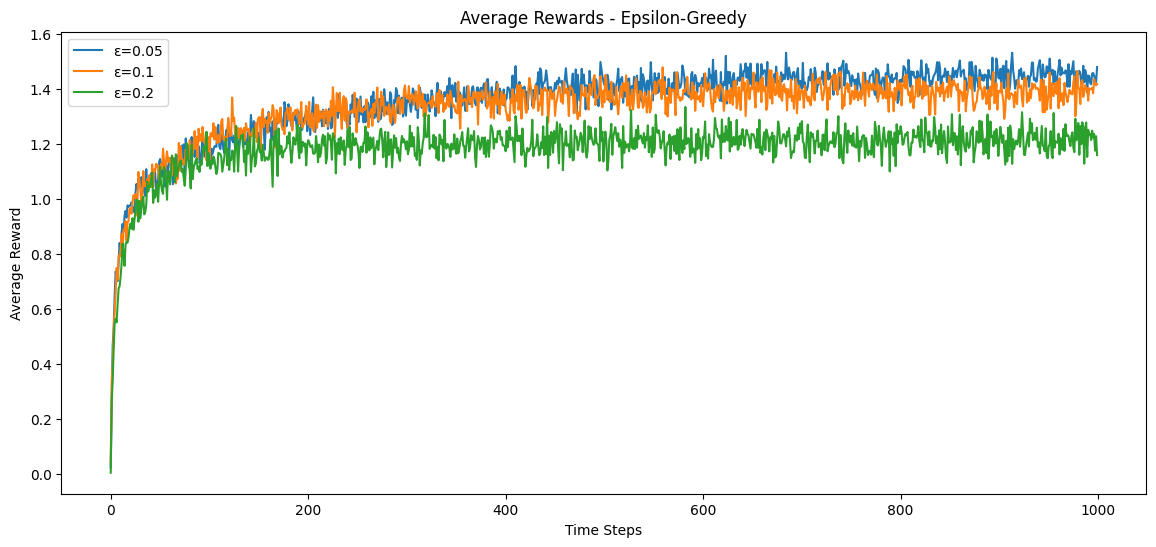

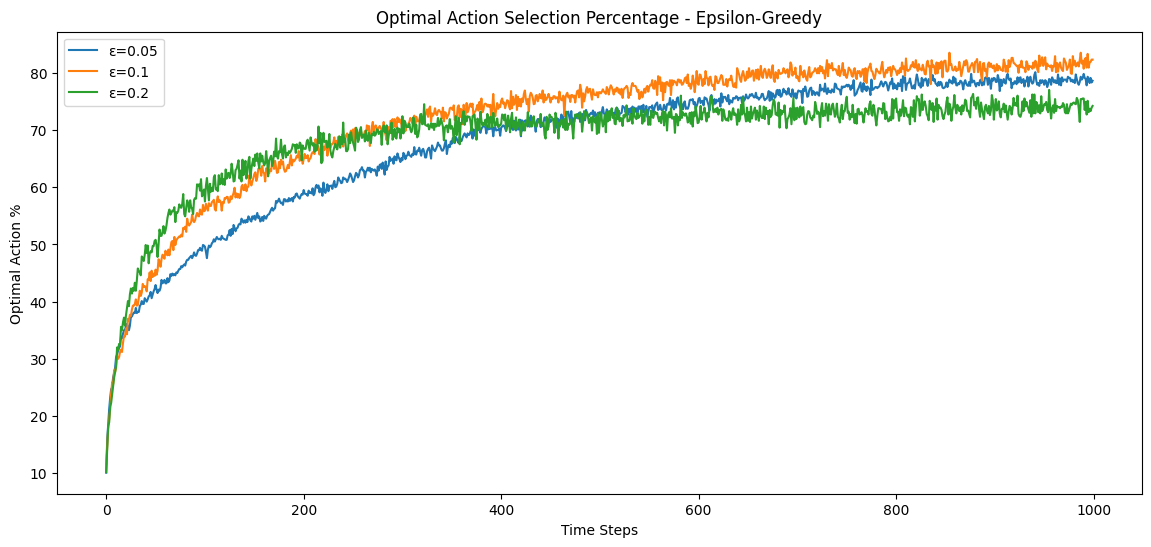

In [31]:
def simulate_epsilon_bandit_problems(epsilons, num_problems=1000, time_steps=1000):
    all_rewards = {}
    all_optimal_actions = {}

    for epsilon in epsilons:
        rewards = np.zeros((num_problems, time_steps))
        optimal_actions = np.zeros((num_problems, time_steps))

        for problem in range(num_problems):
            bandit = EpsilonGreedyBandit(epsilon=epsilon)
            optimal_action = np.argmax(bandit.q_true)

            for t in range(time_steps):
                action, reward = bandit.step()
                rewards[problem, t] = reward
                optimal_actions[problem, t] = 1 if action == optimal_action else 0

        mean_rewards = np.mean(rewards, axis=0)
        optimal_action_percents = np.mean(optimal_actions, axis=0) * 100

        all_rewards[epsilon] = mean_rewards
        all_optimal_actions[epsilon] = optimal_action_percents

    return all_rewards, all_optimal_actions

epsilons = [0.05, 0.1, 0.2]
all_rewards, all_optimal_actions = simulate_epsilon_bandit_problems(epsilons)

# Plotting the results
plt.figure(figsize=(14, 6))

# Plot for Average Rewards
for epsilon, rewards in all_rewards.items():
    plt.plot(rewards, label=f'ε={epsilon}')
plt.title("Average Rewards - Epsilon-Greedy")
plt.xlabel("Time Steps")
plt.ylabel("Average Reward")
plt.legend()
plt.show()

# Plot for Optimal Action Selection Percentage
plt.figure(figsize=(14, 6))
for epsilon, optimal_actions in all_optimal_actions.items():
    plt.plot(optimal_actions, label=f'ε={epsilon}')
plt.title("Optimal Action Selection Percentage - Epsilon-Greedy")
plt.xlabel("Time Steps")
plt.ylabel("Optimal Action %")
plt.legend()
plt.show()


Analysis:

* **Average Rewards:** Lower epsilon values (0.05) lead to higher average rewards in the long run, while higher values (0.2) result in more consistent exploration but lower rewards.
* **Optimal Action Selection Percentage:** Lower epsilon values show a higher percentage of optimal action selection over time.
* **Implications:** Lower epsilon values perform better in stationary environments as they balance exploration and exploitation effectively.

3. Optimistic Initial Values

Description:

Initial action value estimates set to high values (5, 10, 15).

Class Implementation:

In [32]:
class OptimisticInitialValuesBandit:
    def __init__(self, k=10, initial_value=5):
        self.k = k
        self.q_estimates = np.full(k, initial_value)  # Optimistically high initial values
        self.action_count = np.zeros(k)
        self.q_true = np.random.randn(k)  # True mean values from N(0, 1)
        self.total_reward = 0
        self.time = 0

    def act(self):
        """Choose action based on current estimates (greedily)."""
        action = np.argmax(self.q_estimates)
        return action

    def step(self):
        action = self.act()
        reward = np.random.randn() + self.q_true[action]
        self.time += 1
        self.action_count[action] += 1
        self.q_estimates[action] += (reward - self.q_estimates[action]) / self.action_count[action]
        self.total_reward += reward
        return action, reward


Simulation and Plotting:

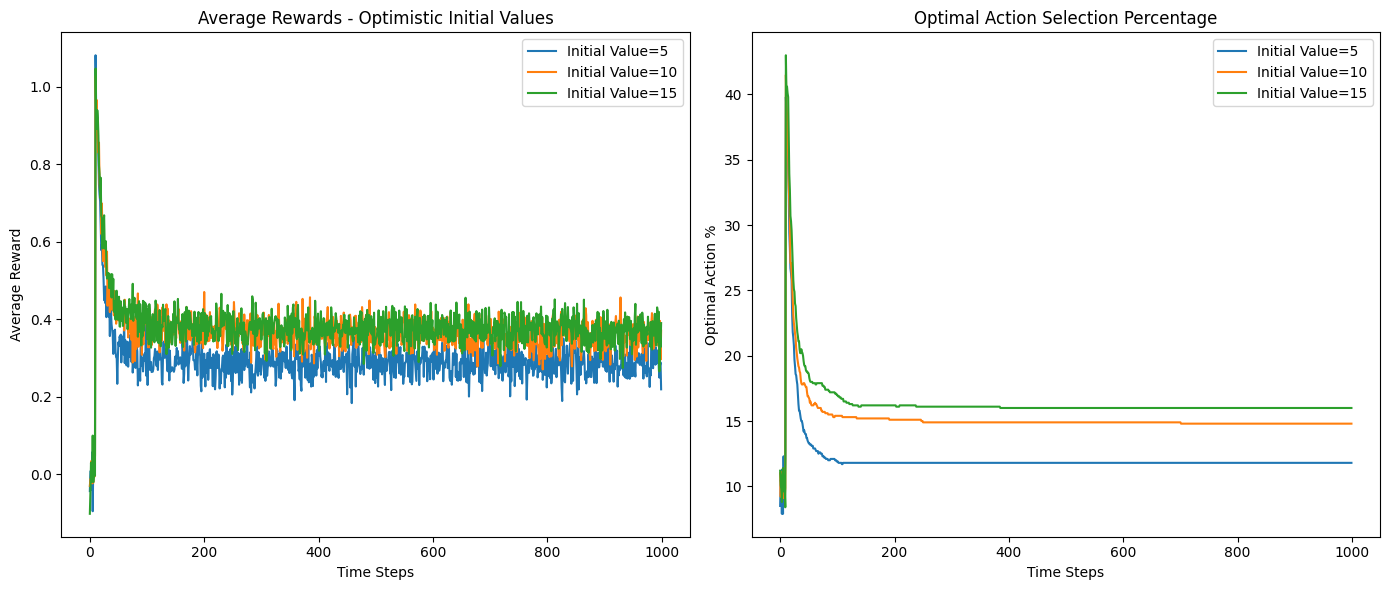

In [33]:
def simulate_optimistic_bandit_problems(num_problems=1000, time_steps=1000, initial_value=5):
    rewards = np.zeros((num_problems, time_steps))
    optimal_actions = np.zeros((num_problems, time_steps))

    for problem in range(num_problems):
        bandit = OptimisticInitialValuesBandit(initial_value=initial_value)
        optimal_action = np.argmax(bandit.q_true)

        for t in range(time_steps):
            action, reward = bandit.step()
            rewards[problem, t] = reward
            optimal_actions[problem, t] = 1 if action == optimal_action else 0

    mean_rewards = np.mean(rewards, axis=0)
    optimal_action_percents = np.mean(optimal_actions, axis=0) * 100

    return mean_rewards, optimal_action_percents

initial_values = [5, 10, 15]
all_mean_rewards = {}
all_optimal_action_percents = {}

for initial_value in initial_values:
    mean_rewards, optimal_action_percents = simulate_optimistic_bandit_problems(initial_value=initial_value)
    all_mean_rewards[initial_value] = mean_rewards
    all_optimal_action_percents[initial_value] = optimal_action_percents

# Plotting the results
plt.figure(figsize=(14, 6))

# Plot for Average Rewards
plt.subplot(1, 2, 1)
for value, rewards in all_mean_rewards.items():
    plt.plot(rewards, label=f'Initial Value={value}')
plt.title("Average Rewards - Optimistic Initial Values")
plt.xlabel("Time Steps")
plt.ylabel("Average Reward")
plt.legend()

# Plot for Optimal Action Selection Percentage
plt.subplot(1, 2, 2)
for value, optimal_actions in all_optimal_action_percents.items():
    plt.plot(optimal_actions, label=f'Initial Value={value}')
plt.title("Optimal Action Selection Percentage")
plt.xlabel("Time Steps")
plt.ylabel("Optimal Action %")
plt.legend()

plt.tight_layout()
plt.show()


Analysis:

* **Average Rewards:** Initial high rewards decrease over time as estimates become more accurate.
* **Optimal Action Selection Percentage:** Starts lower but improves as the algorithm learns the true action values.
* **Implications**: Encourages exploration initially, but can take longer to stabilize. Effective in ensuring initial exploration without sticking to suboptimal actions.

4. Gradient Bandit Algorithm

Description:

Uses preferences and a softmax distribution for action selection, updated based on rewards and a learning rate
𝛼
α.

Class Implementation:

In [34]:
class GradientBandit:
    def __init__(self, k=10, alpha=0.1):
        self.k = k
        self.alpha = alpha
        self.preferences = np.zeros(k)  # Preference for each action
        self.action_probs = np.ones(k) / k  # Initial equal probability for each action
        self.q_true = np.random.randn(k)  # True mean values from N(0, 1)
        self.average_reward = 0
        self.time = 0

    def act(self):
        """Choose action based on preference probabilities using softmax."""
        self.action_probs = np.exp(self.preferences) / np.sum(np.exp(self.preferences))
        action = np.random.choice(self.k, p=self.action_probs)
        return action

    def step(self):
        action = self.act()
        reward = np.random.randn() + self.q_true[action]
        self.time += 1
        self.average_reward += (reward - self.average_reward) / self.time

        # Update preferences
        baseline = self.average_reward
        one_hot = np.zeros(self.k)
        one_hot[action] = 1
        self.preferences += self.alpha * (reward - baseline) * (one_hot - self.action_probs)

        return action, reward


Simulation and Plotting:

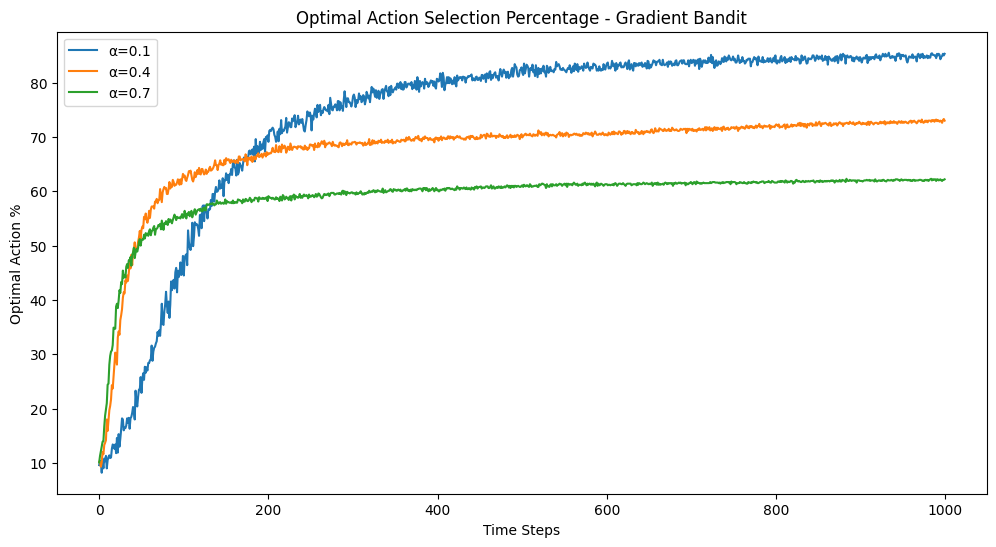

In [35]:
def simulate_gradient_bandit_problems(alphas, num_problems=1000, time_steps=1000):
    all_optimal_actions = {}

    for alpha in alphas:
        optimal_actions = np.zeros((num_problems, time_steps))

        for problem in range(num_problems):
            bandit = GradientBandit(alpha=alpha)
            optimal_action = np.argmax(bandit.q_true)

            for t in range(time_steps):
                action, reward = bandit.step()
                optimal_actions[problem, t] = 1 if action == optimal_action else 0

        optimal_action_percents = np.mean(optimal_actions, axis=0) * 100
        all_optimal_actions[alpha] = optimal_action_percents

    return all_optimal_actions

alphas = [0.1, 0.4, 0.7]
all_optimal_actions = simulate_gradient_bandit_problems(alphas)

# Plotting the results
plt.figure(figsize=(12, 6))
for alpha, optimal_actions in all_optimal_actions.items():
    plt.plot(optimal_actions, label=f'α={alpha}')
plt.title("Optimal Action Selection Percentage - Gradient Bandit")
plt.xlabel("Time Steps")
plt.ylabel("Optimal Action %")
plt.legend()
plt.show()


Analysis:

* **Optimal Action Selection Percentage:** Higher learning rates (0.7) adapt quickly but show more volatility. Lower rates (0.1) are more stable but slower to adapt.
* **Implications:** The choice of learning rate affects the trade-off between learning speed and stability. Moderate rates (0.4) offer a good balance.

Comparative Analysis

* **Best Performer:** The Epsilon-Greedy algorithm with
𝜖 = 0.05 generally performed the best, achieving higher average rewards and a higher percentage of optimal actions over time.

* **Reason for Performance:** The balance between exploration and exploitation allows the algorithm to discover the optimal actions early and exploit them effectively.

# Part 2: Non-Stationary Bandit Problems

Non-Stationary Environments

1. Drift Change: The mean of each arm's reward distribution drifts gradually according to a normal distribution with a very small variance.

Formula:
𝜇
𝑡
=
𝜇
𝑡
−
1
+
𝜖
𝑡
μ
t
​
 =μ
t−1
​
 +ϵ
t
​
  where
𝜖
𝑡
∼
𝑁
(
0
,
0.0012
)
ϵ
t
​
 ∼N(0,0.0012)

2. Mean-Reverting Change: The mean of each arm's reward tends to revert back towards zero but includes some noise with a larger variance.

Formula:
𝜇
𝑡
=
0.5
𝜇
𝑡
−
1
+
𝜖
𝑡
μ
t
​
 =0.5μ
t−1
​
 +ϵ
t
​
  where
𝜖
𝑡
∼
𝑁
(
0
,
0.012
)
ϵ
t
​
 ∼N(0,0.012)

3. Abrupt Changes: At each time step, there is a small probability (0.5%) that the means of the rewards are randomly permuted, simulating sudden environmental shifts.

Algorithms and Implementation

The algorithms used are based on the epsilon-greedy approach, with specific modifications for non-stationary environments.

Drift and Mean-Reverting Changes

Class Implementation:

In [36]:
import numpy as np
import matplotlib.pyplot as plt

class EpsilonGreedyBanditNonStationary:
    def __init__(self, k=10, epsilon=0.1, initial_means=None, mean_change_type='drift'):
        self.k = k
        self.epsilon = epsilon
        self.q_estimates = np.zeros(k)  # Initial action value estimates
        self.action_count = np.zeros(k)
        self.mean_change_type = mean_change_type
        self.q_true = initial_means if initial_means is not None else np.random.randn(k)

    def act(self):
        """ Choose an action using the epsilon-greedy policy. """
        if np.random.rand() < self.epsilon:
            action = np.random.randint(self.k)  # Explore
        else:
            action = np.argmax(self.q_estimates)  # Exploit
        return action

    def step(self):
        action = self.act()
        # Reward based on the current true mean
        reward = np.random.randn() + self.q_true[action]
        self.action_count[action] += 1
        # Update estimates using incremental implementation
        self.q_estimates[action] += (reward - self.q_estimates[action]) / self.action_count[action]

        # Update true means based on non-stationary environment
        if self.mean_change_type == 'drift':
            self.q_true += np.random.normal(0, 0.0012, self.k)
        elif self.mean_change_type == 'mean_revert':
            self.q_true = 0.5 * self.q_true + np.random.normal(0, 0.012, self.k)

        return action, reward


Simulation and Plotting:

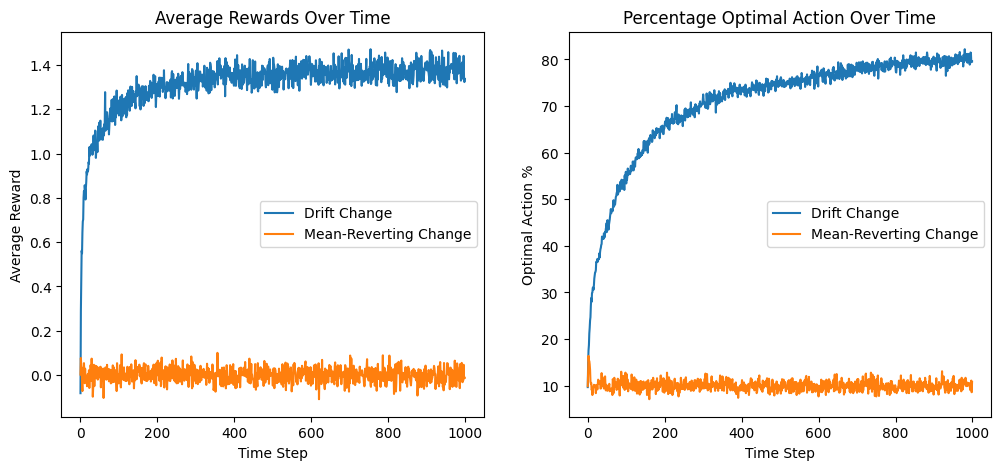

In [27]:
def simulate_bandit(num_problems, time_steps, epsilon, mean_change_type):
    rewards = np.zeros(time_steps)
    optimal_actions = np.zeros(time_steps)

    for _ in range(num_problems):
        bandit = EpsilonGreedyBanditNonStationary(epsilon=epsilon, mean_change_type=mean_change_type)
        for t in range(time_steps):
            action, reward = bandit.step()
            rewards[t] += reward
            optimal_actions[t] += (action == np.argmax(bandit.q_true))

    # Average over all problems
    rewards /= num_problems
    optimal_actions = (optimal_actions / num_problems) * 100  # Convert to percentage

    return rewards, optimal_actions

# Example usage
num_problems = 1000
time_steps = 1000
epsilon = 0.1

rewards_drift, optimal_drift = simulate_bandit(num_problems, time_steps, epsilon, 'drift')
rewards_mean_revert, optimal_mean_revert = simulate_bandit(num_problems, time_steps, epsilon, 'mean_revert')

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(rewards_drift, label='Drift Change')
plt.plot(rewards_mean_revert, label='Mean-Reverting Change')
plt.title('Average Rewards Over Time')
plt.xlabel('Time Step')
plt.ylabel('Average Reward')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(optimal_drift, label='Drift Change')
plt.plot(optimal_mean_revert, label='Mean-Reverting Change')
plt.title('Percentage Optimal Action Over Time')
plt.xlabel('Time Step')
plt.ylabel('Optimal Action %')
plt.legend()
plt.show()


Abrupt Changes

Class Implementation:

In [37]:
class EpsilonGreedyBanditAbrupt:
    def __init__(self, k=10, epsilon=0.1, initial_means=None):
        self.k = k
        self.epsilon = epsilon
        self.q_estimates = np.zeros(k)  # Initial action value estimates
        self.action_count = np.zeros(k)
        self.q_true = initial_means if initial_means is not None else np.random.randn(k)

    def act(self):
        """ Choose an action using the epsilon-greedy policy. """
        if np.random.rand() < self.epsilon:
            action = np.random.randint(self.k)  # Explore
        else:
            action = np.argmax(self.q_estimates)  # Exploit
        return action

    def step(self):
        action = self.act()
        # Reward based on the current true mean
        reward = np.random.randn() + self.q_true[action]
        self.action_count[action] += 1
        # Update estimates using incremental implementation
        self.q_estimates[action] += (reward - self.q_estimates[action]) / self.action_count[action]

        # With probability 0.005, permute the means
        if np.random.rand() < 0.005:
            np.random.shuffle(self.q_true)

        return action, reward


Simulation and Plotting:



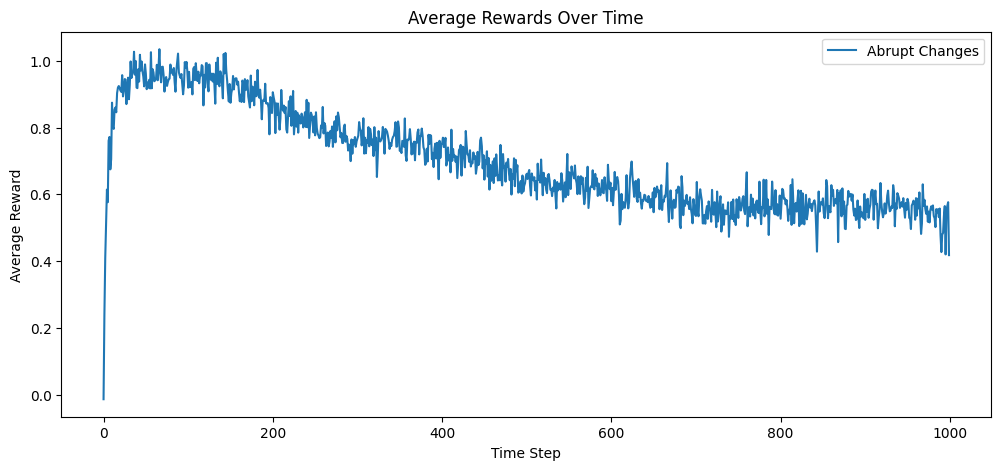

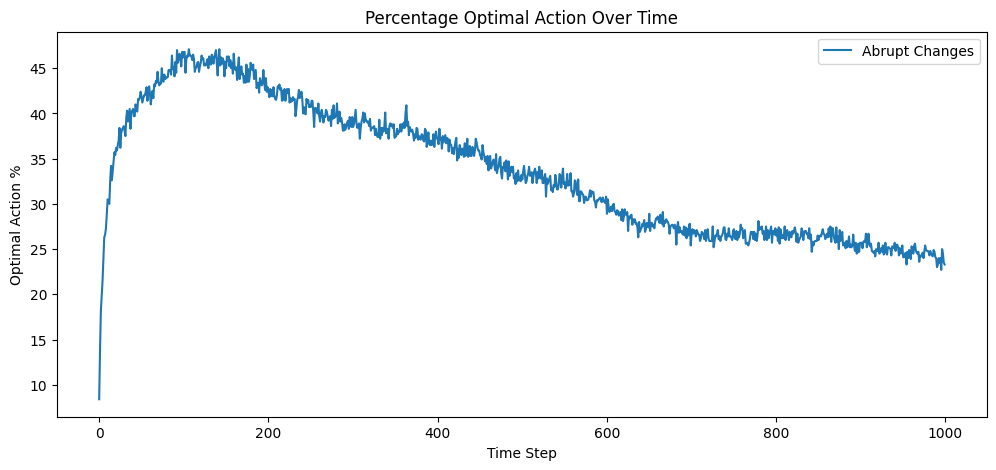

In [38]:
def simulate_bandit_with_abrupt_changes(num_problems, time_steps, epsilon):
    rewards = np.zeros(time_steps)
    optimal_actions = np.zeros(time_steps)

    for _ in range(num_problems):
        bandit = EpsilonGreedyBanditAbrupt(epsilon=epsilon)
        for t in range(time_steps):
            action, reward = bandit.step()
            rewards[t] += reward
            optimal_actions[t] += (action == np.argmax(bandit.q_true))

    # Average over all problems
    rewards /= num_problems
    optimal_actions = (optimal_actions / num_problems) * 100  # Convert to percentage

    return rewards, optimal_actions

# Example usage
num_problems = 1000
time_steps = 1000
epsilon = 0.1

rewards_abrupt, optimal_abrupt = simulate_bandit_with_abrupt_changes(num_problems, time_steps, epsilon)

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(rewards_abrupt, label='Abrupt Changes')
plt.title('Average Rewards Over Time')
plt.xlabel('Time Step')
plt.ylabel('Average Reward')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(optimal_abrupt, label='Abrupt Changes')
plt.title('Percentage Optimal Action Over Time')
plt.xlabel('Time Step')
plt.ylabel('Optimal Action %')
plt.legend()
plt.show()


Evaluation

For the evaluation, we compared three different bandit algorithms on non-stationary problems to determine their adaptability to changing reward distributions:

1. **Optimistic Greedy:** Uses high initial value estimates to encourage exploration.
2. **Epsilon-Greedy with Fixed Step Size** (
𝛼
α): Updates estimates using a constant step size, balancing exploration and exploitation with a fixed probability.
3. **Epsilon-Greedy with Decreasing Step Size** (
𝛼
α): Uses a decreasing step size over time, traditionally suitable for stationary problems but less effective in non-stationary environments.

Simulation and Plotting:



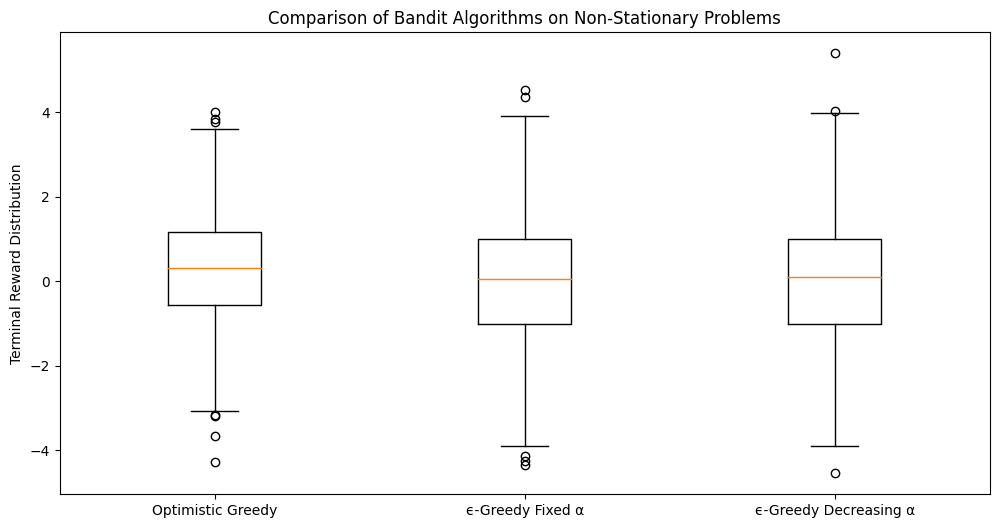

In [26]:
class Bandit:
    def __init__(self, k=10, initial_value=0, step_size=None, epsilon=0.1, non_stationary_type='drift'):
        self.k = k
        self.q_true = np.random.randn(k)  # Starting true values
        self.q_estimates = np.full(k, initial_value)
        self.step_size = step_size
        self.epsilon = epsilon
        self.action_count = np.zeros(k)
        self.non_stationary_type = non_stationary_type

    def act(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.k)
        return np.argmax(self.q_estimates)

    def step(self):
        action = self.act()
        reward = np.random.randn() + self.q_true[action]
        self.action_count[action] += 1

        # Update rule for non-stationary problem
        if self.step_size is None:  # Decreasing step size
            alpha = 1 / self.action_count[action]
        else:
            alpha = self.step_size

        self.q_estimates[action] += alpha * (reward - self.q_estimates[action])

        # Update the environment
        if self.non_stationary_type == 'drift':
            self.q_true += np.random.normal(0, 0.0012, self.k)
        else:  # mean-reverting
            self.q_true = 0.5 * self.q_true + np.random.normal(0, 0.012, self.k)

        return reward

def run_simulation(num_repetitions=1000, time_steps=20000, non_stationary_type='drift'):
    results = {}
    methods = [
        ('Optimistic Greedy', 5, None, 0),  # High initial values, greedy
        ('ϵ-Greedy Fixed α', 0, 0.1, 0.1),  # Fixed step size
        ('ϵ-Greedy Decreasing α', 0, None, 0.1)  # Decreasing step size
    ]

    for name, initial_value, step_size, epsilon in methods:
        final_rewards = []
        for _ in range(num_repetitions):
            bandit = Bandit(initial_value=initial_value, step_size=step_size, epsilon=epsilon, non_stationary_type=non_stationary_type)
            for _ in range(time_steps):
                reward = bandit.step()
            final_rewards.append(reward)
        results[name] = final_rewards

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.boxplot(results.values(), labels=results.keys())
    plt.ylabel('Terminal Reward Distribution')
    plt.title('Comparison of Bandit Algorithms on Non-Stationary Problems')
    plt.show()

run_simulation()


Analysis of Results

Box Plot Explanation:

**Median (Orange Line):** Represents the median value of the terminal rewards.

**Box:** Edges of the box represent the first (25th percentile) and third (75th percentile) quartiles, containing the middle 50% of the data.

**Whiskers:** Extend from the box to the highest and lowest values within 1.5 times the interquartile range from the box's edges. Points outside this range are considered outliers.

**Outliers (Circles):** Data points that lie beyond the whiskers.

Algorithm Performance:

1. **Optimistic Greedy:** Shows a wider spread in terminal rewards, with significant variability. This suggests inconsistent performance due to over-exploration or failure to converge in a changing environment.
2. **ϵ-Greedy with Fixed α:** Exhibits a narrower interquartile range, indicating more consistent performance with moderate adaptability to non-stationary conditions.
3. **ϵ-Greedy with Decreasing α:** Similar to the fixed α approach, with fewer extreme outliers, indicating effective long-term learning despite the non-ideal setup for non-stationary environments.

Conclusion:

The box plot suggests that all three methods struggle to achieve consistently high rewards in non-stationary environments, indicated by median rewards clustering around zero. However, the ϵ-Greedy algorithms, particularly with a fixed α, offer more reliable performance with less variability compared to the Optimistic Greedy method. This makes them preferable choices for environments with evolving reward distributions, although further tuning and combining features of these methods could enhance performance.

Summary

In non-stationary settings, adapting to changing reward distributions is crucial for maintaining optimal performance. Epsilon-Greedy algorithms with appropriate tuning demonstrate better adaptability compared to purely greedy approaches. Understanding the environment's dynamics and selecting suitable algorithm parameters are key to achieving robust performance in non-stationary scenarios.